# Анализ результатов работы модели QAOA

## Структура данных

|budget|risk|weights|n_layers|n_iterations|result_over_time|samples|qa_weights|
|---|---|---|---|---|---|---|---|
|numeric, ограничение по бюджету, входная величина|float(0-1], величина риска, входная величина|бинарные веса{0, 1}, результат решения классической модели, для сравнения|(int>0)параметр, задающий глубину квантовой схемы, входная величина|(int>~1000)количество итерации при оптимизации модели, входная величина|(float)значение функции оптимизации в процессе итераций, выходная величина, ожидается убывание по индексу|list({0, 1})сэмплы решений, выдаваемые в результате работы квантовой модели, выходная величина, ожидается, что наиболее часто встречающийся сэмпл отражает оптимальное решение|float[0-1], вещественные значения, отражающие ожидаемые значения весов оптимального решения|

## Базис для анализа (для сравнения weights, оптимальных samples, и qa_weights)

### Доходность

$d = \mathbf{mu} \cdot \mathbf{weights}$ 

### Риск

$r = \mathbf{weights} \cdot \mathbf{sigma} \cdot \mathbf{weights}$

### Коэффициент шарпа

$s = (d - r_0) / r$

$r_0$ - доходность при нулевом риске, для нашего случая (S&P), это 0.035

$s = (d - 0.035) / r$


### Hamming distance (для сравнения weights и оптимальных samples)
см. `from scipy.spatial import distance.hamming`

### ROC (разобраться)

## Ожидаемые результаты

- Графики зависимостей метрик от входных параметров
- 3-4 примера кривых result_over_time на одном графике
- Статистический анализ расхождения метрик результатов классической и qaoa моделей
- Базовое стравнение метрик моделей на тестовых данных
- Можно провести анализ распределения samples для моделей

In [143]:
import pandas as pd


data_train = pd.read_csv('datasets/output_qaoa/train_data.csv')
data_test = pd.read_csv('datasets/output_qaoa/test_data.csv')
data_out = pd.read_csv('datasets/output_qaoa/po_results2.csv')

In [144]:
mu_train = data_train.mean()*252
mu_test = data_test.mean()*252
sigma_train = data_train.cov()*252
sigma_test = data_test.cov()*252

In [145]:
data_out.infer_objects()

,budget,risk,weights,n_layers,n_iterations,result_over_time,samples,qa_weights
0,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,100,"[np.float64(-24.6561630985358), np.float64(-24...",[[0 0 0 ... 0 0 1]\n [0 0 0 ... 0 0 0]\n [0 0 ...,[0.74084164 0.77994444 0.51284688 0.32307975 0...
1,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,200,"[np.float64(0.33358986933421586), np.float64(0...",[[1 1 1 ... 0 0 0]\n [0 1 0 ... 0 0 0]\n [0 0 ...,[ 0.0426299 0.04756588 0.01300453 -0.007823...
2,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,300,"[np.float64(0.5780834692871849), np.float64(0....",[[1 0 1 ... 0 0 0]\n [0 1 0 ... 0 1 0]\n [0 0 ...,[ 1.97135060e-16 1.62711641e-16 -5.06864516e-...
3,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],2,100,"[np.float64(20.816389363165776), np.float64(20...",[[0 1 0 ... 0 1 0]\n [0 0 0 ... 1 1 1]\n [0 0 ...,[-3.43401804e-09 -3.36790761e-09 -4.37237628e-...
4,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],2,200,"[np.float64(16.64174207567648), np.float64(16....",[[1 1 0 ... 1 0 0]\n [1 0 0 ... 0 0 0]\n [0 0 ...,[0.4904841 0.50669719 0.45696551 0.44682303 0...
...,...,...,...,...,...,...,...,...
103,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],3,200,"[np.float64(19.19070184383374), np.float64(19....",[[1 0 0 ... 1 0 0]\n [0 0 1 ... 1 0 0]\n [0 1 ...,[-0.09001197 -0.12500129 0.03340016 0.170207...
104,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],3,300,"[np.float64(22.538233806664337), np.float64(22...",[[0 1 1 ... 1 0 0]\n [1 1 0 ... 0 1 1]\n [0 1 ...,[-0.10738697 -0.25114071 0.0846075 0.261580...
105,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],4,100,"[np.float64(26.890281547727202), np.float64(26...",[[1 1 1 ... 1 0 0]\n [1 0 0 ... 0 0 0]\n [0 0 ...,[-0.15040123 -0.18821265 0.00387576 0.181565...
106,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],4,200,"[np.float64(9.471854526612544), np.float64(9.4...",[[0 1 1 ... 0 1 1]\n [1 1 1 ... 0 0 0]\n [0 0 ...,[ 0.0070132 -0.03408294 0.11244629 0.238247...


In [146]:
data_out.info()

<class 'pandas.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            108 non-null    int64  
 1   risk              108 non-null    float64
 2   weights           108 non-null    str    
 3   n_layers          108 non-null    int64  
 4   n_iterations      108 non-null    int64  
 5   result_over_time  108 non-null    str    
 6   samples           108 non-null    str    
 7   qa_weights        108 non-null    str    
dtypes: float64(1), int64(3), str(4)
memory usage: 6.9 KB


In [147]:
import numpy as np


#data_out['qa_weights'] = data_out['qa_weights'].apply(lambda x: (1 - np.array(x.strip('[]').split(), dtype=np.float64))/2)
data_out['weights'] = data_out['weights'].apply(lambda x: np.array(x.strip('[]').split(), dtype=np.float64))

In [148]:
data_out['result_over_time'] = data_out['result_over_time'].apply(lambda x: x.strip('[]').split(', ')).\
apply(lambda x: np.array([x_i.lstrip('np.float64(').rstrip(')') for x_i in x], dtype=np.float64))

In [149]:
#data_out['samples'] = data_out['samples'].apply(lambda x: x[1:-1].split('\n'))

In [150]:
data_out['qa_weights'] = data_out['qa_weights'].apply(lambda x: np.array(x.strip('[]').split(), dtype=np.float64))

In [151]:
data_out['qa_weights']

0      [0.74084164, 0.77994444, 0.51284688, 0.3230797...
1      [0.0426299, 0.04756588, 0.01300453, -0.0078231...
2      [1.9713506e-16, 1.62711641e-16, -5.06864516e-1...
3      [-3.43401804e-09, -3.36790761e-09, -4.37237628...
4      [0.4904841, 0.50669719, 0.45696551, 0.44682303...
                             ...                        
103    [-0.09001197, -0.12500129, 0.03340016, 0.17020...
104    [-0.10738697, -0.25114071, 0.0846075, 0.261580...
105    [-0.15040123, -0.18821265, 0.00387576, 0.18156...
106    [0.0070132, -0.03408294, 0.11244629, 0.2382478...
107    [0.01640131, -0.00473763, 0.0477678, 0.0926631...
Name: qa_weights, Length: 108, dtype: object

In [152]:
data_out['qa_weights_bin'] = data_out['qa_weights'].apply(lambda x: np.where(x > 0, 1, 0))

In [153]:
data_out['qa_weights_bin']

0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1      [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
2      [1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
                       ...                 
103    [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
104    [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
105    [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
106    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
107    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Name: qa_weights_bin, Length: 108, dtype: object

In [154]:
data_out['returns'] = data_out['weights'].apply(lambda x: x @ mu_train)
data_out['qa_returns_bin'] = data_out['qa_weights_bin'].apply(lambda x: x @ mu_train)

In [155]:
data_out[['returns', 'qa_returns_bin']]

,returns,qa_returns_bin
0,0.873488,2.052733
1,0.873488,1.999205
2,0.873488,1.609957
3,0.873488,0.000000
4,0.873488,2.052733
...,...,...
103,1.150183,1.179245
104,1.150183,1.179245
105,1.150183,1.038157
106,1.150183,1.720417


In [156]:
data_out['qa_weights_sc'] = data_out['qa_weights'].apply(lambda x: (1. + x) / 2)

In [157]:
data_out['qa_returns_sc'] = data_out['qa_weights_sc'].apply(lambda x: x @ mu_train)

<Axes: >

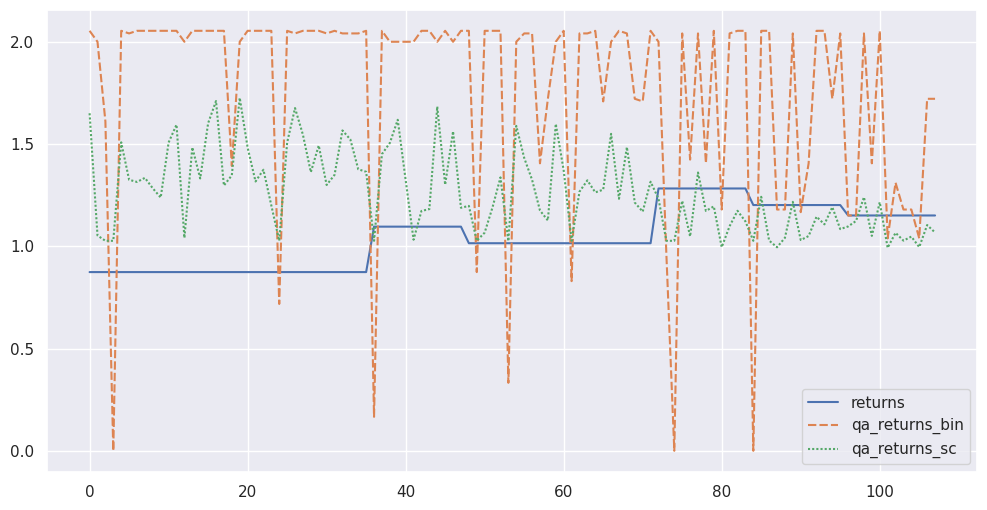

In [158]:
import seaborn as sns


sns.lineplot(data_out[['returns', 'qa_returns_bin', 'qa_returns_sc']])

In [159]:
data_out[['risk', 'qa_risk_bin', 'qa_risk_sc']] = \
data_out[['weights', 'qa_weights_bin', 'qa_weights_sc']].map(lambda x: np.sqrt(x @ sigma_train @ x))

<Axes: >

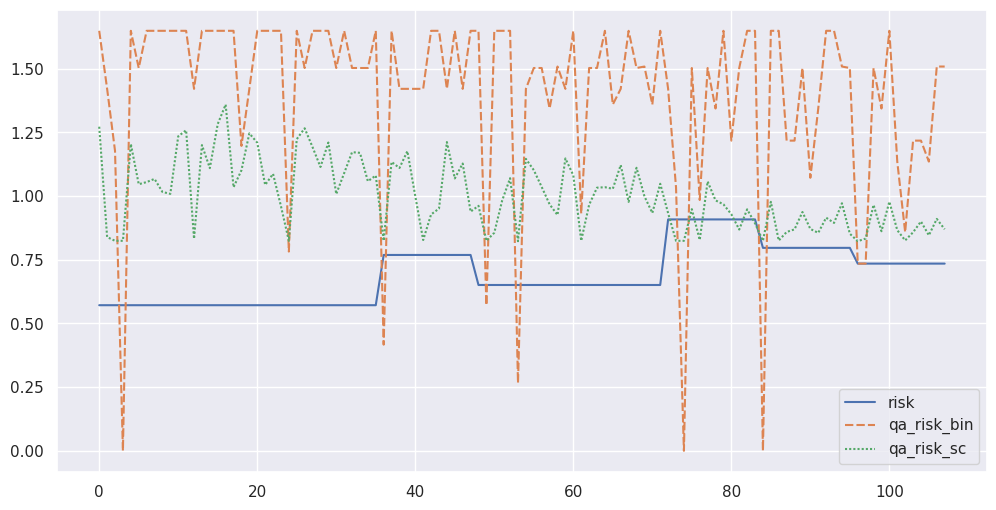

In [160]:
sns.lineplot(data_out[['risk', 'qa_risk_bin', 'qa_risk_sc']])

In [161]:
data_out[['sharpe', 'qa_sharpe_bin', 'qa_sharpe_sc']] = \
(data_out[['returns', 'qa_returns_bin', 'qa_returns_sc']] - 0.035).div(data_out[['risk', 'qa_risk_bin', 'qa_risk_sc']].values).\
replace([np.inf, -np.inf], 0.)

<Axes: >

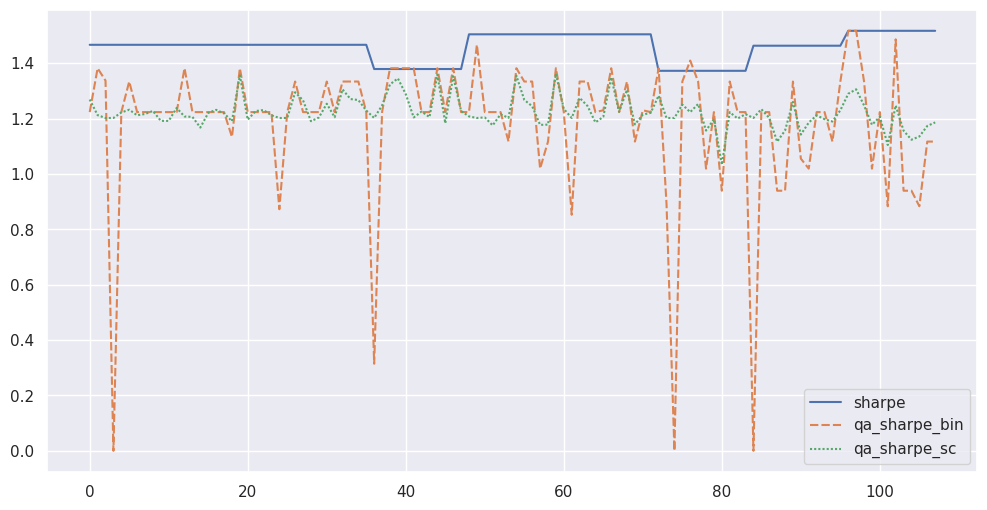

In [162]:
sns.lineplot(data_out[['sharpe', 'qa_sharpe_bin', 'qa_sharpe_sc']])

In [163]:
data_out

,budget,risk,weights,n_layers,n_iterations,result_over_time,samples,qa_weights,qa_weights_bin,returns,qa_returns_bin,qa_weights_sc,qa_returns_sc,qa_risk_bin,qa_risk_sc,sharpe,qa_sharpe_bin,qa_sharpe_sc
0,3,0.571701,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,100,"[-24.6561630985358, -24.6561630985358, -24.656...",[[0 0 0 ... 0 0 1]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[0.74084164, 0.77994444, 0.51284688, 0.3230797...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.873488,2.052733,"[0.87042082, 0.88997222, 0.7564234400000001, 0...",1.649751,1.649111,1.272527,1.466655,1.223528,1.268932
1,3,0.571701,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,200,"[0.33358986933421586, 0.33358986933421586, 0.3...",[[1 1 1 ... 0 0 0]\n [0 1 0 ... 0 0 0]\n [0 0 ...,"[0.0426299, 0.04756588, 0.01300453, -0.0078231...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]",0.873488,1.999205,"[0.52131495, 0.52378294, 0.506502265, 0.496088...",1.052410,1.421211,0.839130,1.466655,1.382064,1.212459
2,3,0.571701,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,300,"[0.5780834692871849, 0.5780834692871849, 0.578...",[[1 0 1 ... 0 0 0]\n [0 1 0 ... 0 1 0]\n [0 0 ...,"[1.9713506e-16, 1.62711641e-16, -5.06864516e-1...","[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]",0.873488,1.609957,"[0.5000000000000001, 0.5000000000000001, 0.5, ...",1.026367,1.177718,0.824556,1.466655,1.337295,1.202304
3,3,0.571701,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2,100,"[20.816389363165776, 20.816389363165776, 2.757...",[[0 1 0 ... 0 1 0]\n [0 0 0 ... 1 1 1]\n [0 0 ...,"[-3.43401804e-09, -3.36790761e-09, -4.37237628...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.873488,0.000000,"[0.49999999828299097, 0.4999999983160462, 0.49...",1.026367,0.000000,0.824556,1.466655,0.000000,1.202304
4,3,0.571701,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2,200,"[16.64174207567648, 16.64174207567648, 7185135...",[[1 1 0 ... 1 0 0]\n [1 0 0 ... 0 0 0]\n [0 0 ...,"[0.4904841, 0.50669719, 0.45696551, 0.44682303...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.873488,2.052733,"[0.74524205, 0.7533485950000001, 0.728482755, ...",1.507588,1.649111,1.204891,1.466655,1.223528,1.222175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,5,0.735020,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",3,200,"[19.19070184383374, 19.19070184383374, 19.1907...",[[1 0 0 ... 1 0 0]\n [0 0 1 ... 1 0 0]\n [0 1 ...,"[-0.09001197, -0.12500129, 0.03340016, 0.17020...","[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",1.150183,1.179245,"[0.45499401500000003, 0.43749935500000003, 0.5...",1.027284,1.217893,0.857945,1.517213,0.939528,1.156583
104,5,0.735020,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",3,300,"[22.538233806664337, 22.538233806664337, 12.61...",[[0 1 1 ... 1 0 0]\n [1 1 0 ... 0 1 1]\n [0 1 ...,"[-0.10738697, -0.25114071, 0.0846075, 0.261580...","[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",1.150183,1.179245,"[0.446306515, 0.374429645, 0.54230375, 0.63079...",1.046875,1.217893,0.900450,1.517213,0.939528,1.123743
105,5,0.735020,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",4,100,"[26.890281547727202, 26.890281547727202, 26.89...",[[1 1 1 ... 1 0 0]\n [1 0 0 ... 0 0 0]\n [0 0 ...,"[-0.15040123, -0.18821265, 0.00387576, 0.18156...","[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]",1.150183,1.038157,"[0.42479938500000003, 0.405893675, 0.50193788,...",0.995710,1.135560,0.846077,1.517213,0.883403,1.135488
106,5,0.735020,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",4,200,"[9.471854526612544, 9.471854526612544, 9.47185...",[[0 1 1 ... 0 1 1]\n [1 1 1 ... 0 0 0]\n [0 0 ...,"[0.0070132, -0.03408294, 0.11244629, 0.2382478...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.150183,1.720417,"[0.5035066, 0.48295853, 0.556223145, 0.6191239...",1.103296,1.508832,0.910458,1.517213,1.117034,1.173361


In [164]:
data_out2 = data_out[['budget', 'n_layers', 'n_iterations', 'sharpe', 'qa_sharpe_bin', 'qa_sharpe_sc']].drop_duplicates()

In [165]:
data_out3 = data_out2.sort_values(by=['n_layers', 'n_iterations'])
data_out3['n_layers@n_iterations'] = data_out3.apply(lambda x: str(int(x['n_layers'])) + '@' + str(int(x['n_iterations'])), axis=1)
data_out3.drop(columns=['n_layers', 'n_iterations'], inplace=True)

In [166]:
#data_out3 = data_out2.melt(id_vars=['budget', 'n_layers', 'n_iterations'], value_vars=['sharpe', 'qa_sharpe_sc'],
#                          var_name='method', value_name='sharpe_value')

<Axes: xlabel='n_layers@n_iterations', ylabel='qa_sharpe_bin'>

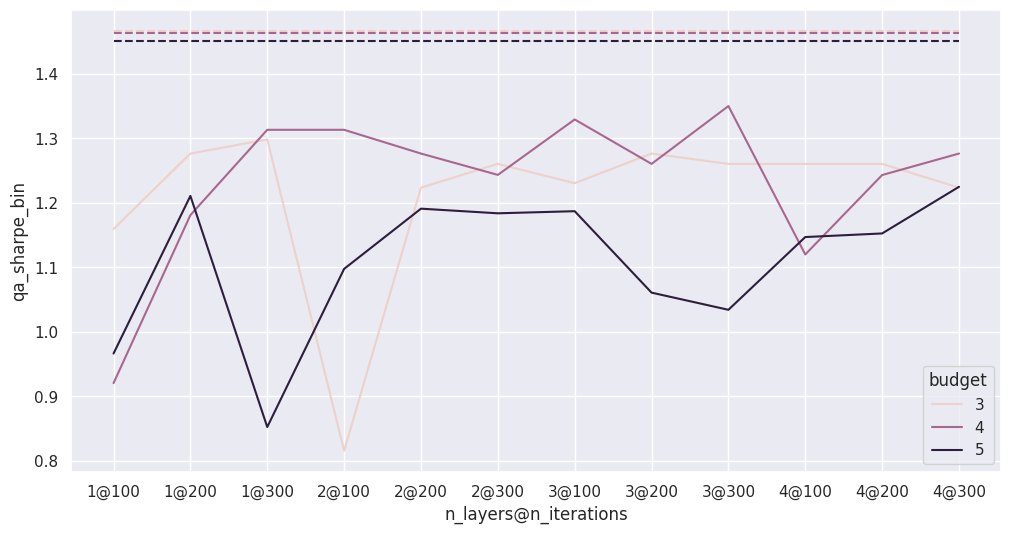

In [167]:
#for i, b in enumerate(data_out2['budget'].unique()):
sns.set(rc={"figure.figsize": (12, 6)})
ax = sns.lineplot(data_out3, x='n_layers@n_iterations', y='qa_sharpe_bin', hue='budget', errorbar=None)
sns.lineplot(data_out3, x='n_layers@n_iterations', y='sharpe', hue='budget', ax=ax, linestyle='--', errorbar=None, legend=False)


In [168]:
(np.array(12*[0.5]) @ mu_train - 0.035) / np.sqrt(np.array(12*[0.5]) @ sigma_train @ np.array(12*[0.5]))

np.float64(1.2023040820073838)

In [173]:
data_outE = data_out[['result_over_time', 'n_iterations', 'n_layers']].sample(4).reset_index(drop=True)

In [174]:
data_outE

,result_over_time,n_iterations,n_layers
0,"[11.576480033161369, 11.576480033161369, 11.57...",100,2
1,"[12.521003084164219, 12.099464820698062, 12.09...",300,4
2,"[0.5780834692871849, 0.5780834692871849, 0.578...",300,1
3,"[557870185306726.0, 557870185306726.0, 5578701...",200,1


In [175]:
data_outE['result_over_time'].apply(len)

0     74
1    240
2     31
3     20
Name: result_over_time, dtype: int64

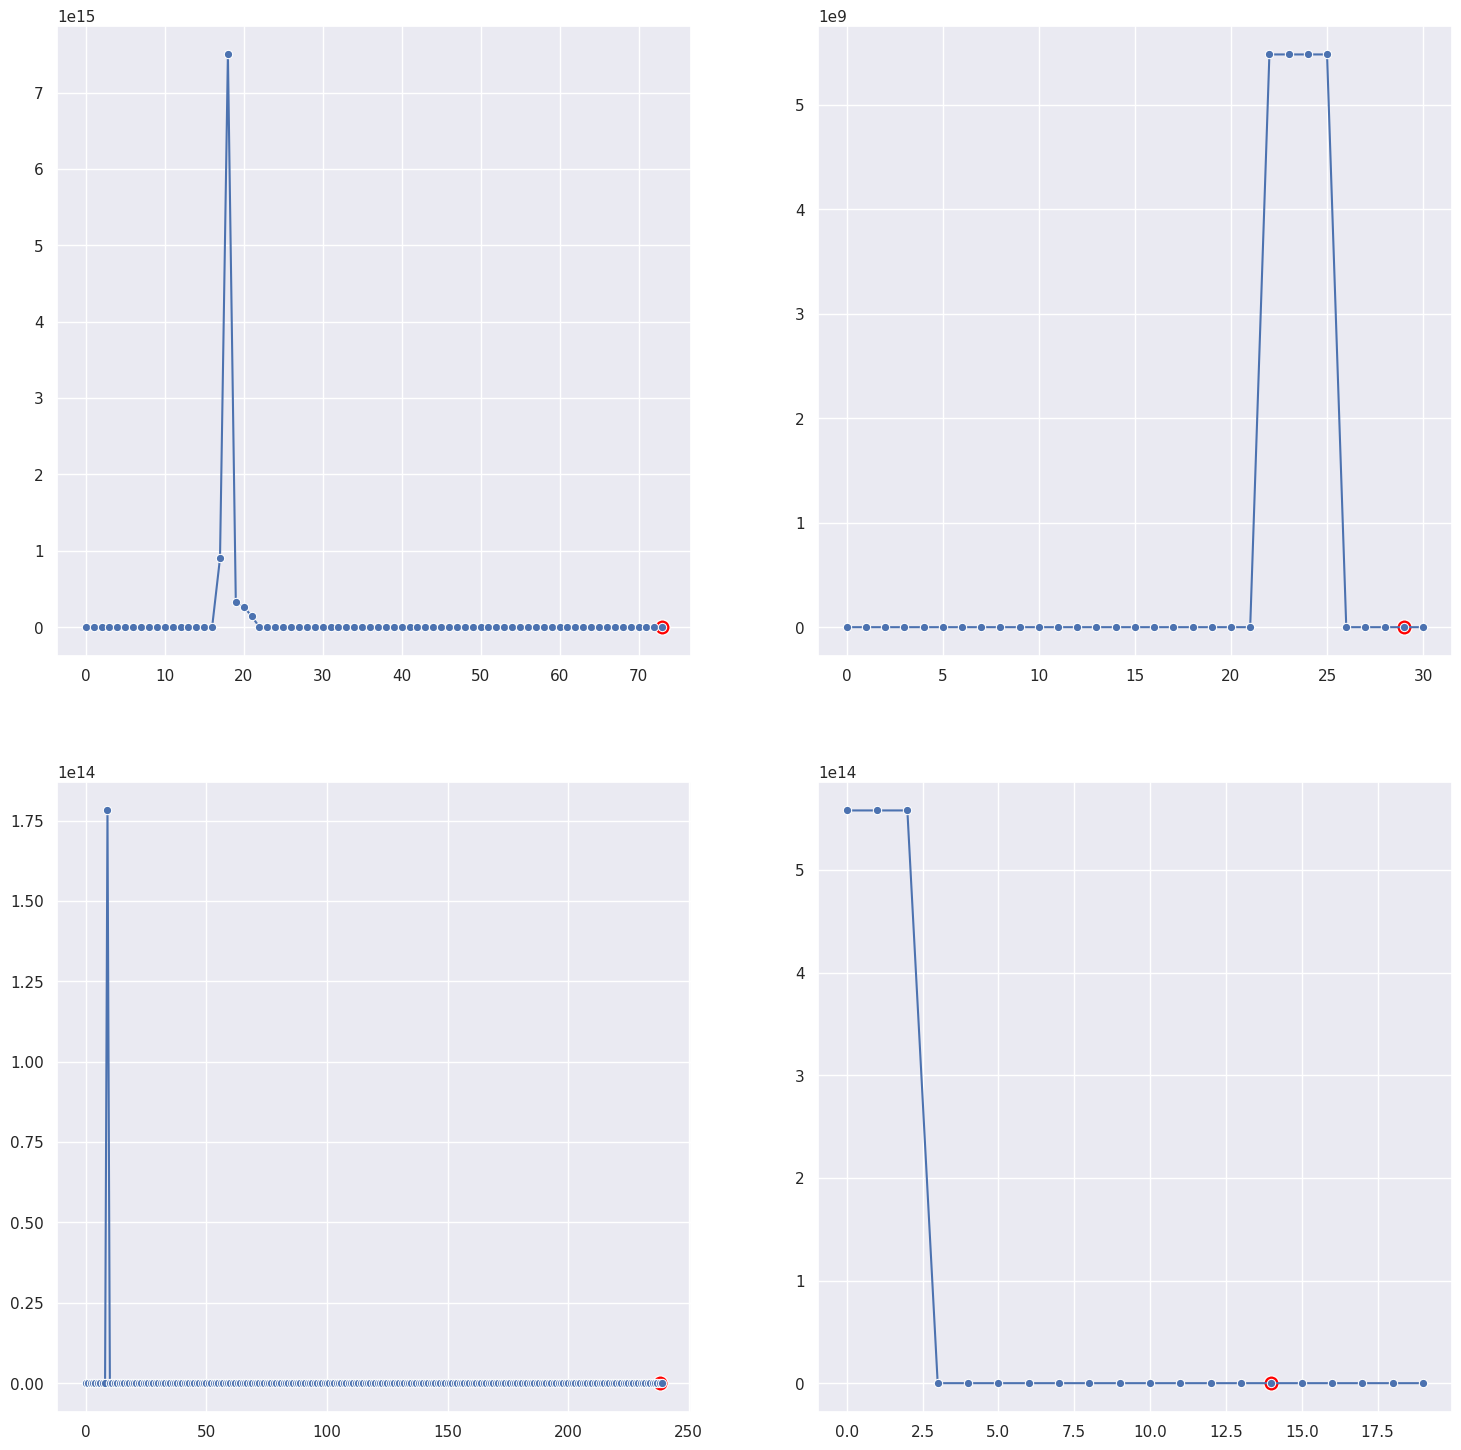

In [194]:
import matplotlib.pyplot as plt


f, a = plt.subplots(2, 2, figsize=(18, 18))

for i in range(2):
    for j in range(2):
        y_data = data_outE.loc[i + j*2, 'result_over_time']
        x_min = np.argmin(y_data)
        y_min = np.min(y_data)
        sns.lineplot(y_data, marker='o', ax=a[i][j])
        sns.scatterplot(x=[x_min,], y=[y_min,], marker='o', s=120, color='red', ax=a[i][j])